#Notebook: Prediction of Risky Credit Customers

[https://colab.research.google.com/drive/1RJpoSujIxsxjQn0IaZH00b1uFww3u05O](https://colab.research.google.com/drive/1RJpoSujIxsxjQn0IaZH00b1uFww3u05O)

**Link to Repository**

[https://github.com/PernilleSilke/projekt](https://https://github.com/PernilleSilke/projekt)

##Importing Dataset 

In [0]:
#Importing the necessary pacakages that includes necessary functions for importing, cleaning and preprocessing data. 
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
import numpy as np

In [0]:
Credit_data = pd.read_csv('https://raw.githubusercontent.com/PernilleSilke/projekt/master/german_credit_data.csv?token=ANBLF6NR5VRAG6CNMNFAUQ25QH5ZA')

##Explorative Data Analysis 

<p>First, we start this project by exploring the data. This gives an overview of the data and an idea of the correlations in the data. The explorative analysis consists of a describing part and a correlation part. The descriptive part will be an unfolding of the contents in the dataset, e.g. to explore which types, features and attributes we are dealing with. In the correlation part we are searching for relationships between the data in the dataset. </p>  

###Decriptive Data Analysis

In [0]:

Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


The outcome above tells us that there are 1000 observations and 11 colmns in the dataset. We also see the names of the columns and their data type. This shows that we are working with different kinds of datatypes both numeric integer variables and objets containing text. Our goal is to convert the object features to numerical floats or integers, which is done in the preprocessing area further down.

We also get an indication of some missing data in the columns 'Saving_accounts' and 'Checking account', since the number of observations are smaller in these columns. This is also taken care of in the preprocessing of the data. 



In [0]:
#Quick glance at the dataset
Credit_data.head() 

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


This output gives us an idea of what information the data set contains. In the dataset every unit has the features age, sex, job information, housing situation, the saving account and checking account in categories, the credit amount, duration of the loan, the purpose of the loan and whether the loaner is in good or bad risk. A deeper description of the features can be found in the stakeholder report.
 

In [0]:
#checking the columns for possible 'errors' which may affect the dataanalysis. 
Credit_data.columns


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

We have noticed a space in the columns 'Saving account', 'Checking account'and 'Credit amount'. This may cause some trouble when calling on the columns later. Therefore we start renamening these. 

In [0]:
Credit_data.rename(columns={'Saving accounts':'Saving_accounts'}, 
                 inplace=True)
Credit_data.rename(columns={'Checking account':'Checking_account'}, 
                 inplace=True)
Credit_data.rename(columns={'Credit amount':'Credit_amount'}, 
                 inplace=True)

Now we want to get a better glance at the categories in the strings by printing the unique values of the columns. 

In [0]:
print("Sex : ",Credit_data.Sex.unique())
print("Housing : ",Credit_data.Housing.unique())
print("Saving accounts : ",Credit_data['Saving_accounts'].unique())
print("Checking account : ",Credit_data['Checking_account'].unique())
print("Purpose : ",Credit_data.Purpose.unique())
print("Risk : ",Credit_data.Risk.unique())

Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account :  ['little' 'moderate' nan 'rich']
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk :  ['good' 'bad']


From this it is clear that the **sex variable** is a dummy containing two categories (male, female). This same counts for 'Risk' with good and bad risk.

The **housing variable** contains 3 categories own, rent or free housing

The **saving account** is categorized in little, moderate, quite rich, rich. 
Nan indicates that there are some missing values in this variable and in Checking account (but we already knew that from the info display)

The **checking account** is categorized in little, moderate and rich.

Lastely **the purpose** of the loan is categorized in 8 categorize; Radio/TV, educational purposes, furniture/equipment, car, business, domestic appliances, repairs and vacation/others

This gives a good idea of what information the strings contain. We now take a deeper look on the numerical variables 

In [0]:
#describtion of numeric features:
Credit_data.describe()

,Unnamed: 0,Age,Job,Credit_amount,Duration
count,1000.000,1000.000,1000.000,1000.000,1000.000
mean,499.500,35.546,1.904,3271.258,20.903
std,288.819,11.375,0.654,2822.737,12.059
min,0.000,19.000,0.000,250.000,4.000
25%,249.750,27.000,2.000,1365.500,12.000
50%,499.500,33.000,2.000,2319.500,18.000
75%,749.250,42.000,2.000,3972.250,24.000
max,999.000,75.000,3.000,18424.000,72.000


In this table we see that the average **age** of the entries in the dataset is 35,5 years, and that 75 % of the entries are below 42 years. The youngest person is 19 years old and the oldest is 75 years old.

The **job** description ranging from 0 to 3 depending on how skilled the loaner is. As described in the stakeholder report 0 being the least skilled og 3 the highest skilled. We see that the mean in this case is 1.9, meaning there is a good distribution in this variable.

The **credit amount** range from 250 til 18424, the mean being 3271,258 and 75 % being less than 3972,25.

The **duration** of the loan varies from 4 to 72 months, with the aveage loan taking 20.9 months to repay. 75 % of the loans are repaid by 24 months.

Now that we have a description of the data, we want to look for correlations. 

##Correlations in the data

We have an idea that the variables: Sex, age, job, housing, saving account, checking ccount, credit amount, duration and purpose of the loan have an influence on whether the loaner is at bad or good risk, we will now try to visualize if there is a correlation between these parameters

**Sex and Risk**

In [0]:
pd.crosstab(Credit_data.Sex,Credit_data.Risk, normalize='index')

Risk,bad,good
Sex,,
female,0.352,0.648
male,0.277,0.723


In this table we see that more females than males are categoried as bad risk. 

**Age and Risk**

In [0]:
#First categorizing age in intervals
interval = (18, 30, 60, 100)

#Categorizing the observations in the categories 'young', 'Adult' and senior 
#makes it easier to spot an correlation when plotting the categories as bars
Age_cat = ['Young', 'Adult', 'Senior']
Credit_data["Age_cat"] = pd.cut(Credit_data.Age, interval, labels=Age_cat)

#Now tjecking for correlation 
pd.crosstab(Credit_data.Age_cat,Credit_data.Risk, normalize='index')

Risk,bad,good
Age_cat,,
Young,0.360,0.640
Adult,0.261,0.739
Senior,0.222,0.778


In this table it looks like that the older you are, the probability of being a bad risk is smaller. But let's look if our categorization is valid

In [0]:
#counts proportions
Credit_data.Age_cat.value_counts(normalize=True)

Adult    0.544
Young    0.411
Senior   0.045
Name: Age_cat, dtype: float64

The categories Young and adult looks pretty valid but the senior categori is almost not represented, which means, that the results for this categori are not very reliable and should not be taking into account. 

**The purpose of the loan and risk**

Risk                  bad  good
Purpose                        
business            0.351 0.649
car                 0.315 0.685
domestic appliances 0.333 0.667
education           0.390 0.610
furniture/equipment 0.320 0.680
radio/TV            0.221 0.779
repairs             0.364 0.636
vacation/others     0.417 0.583


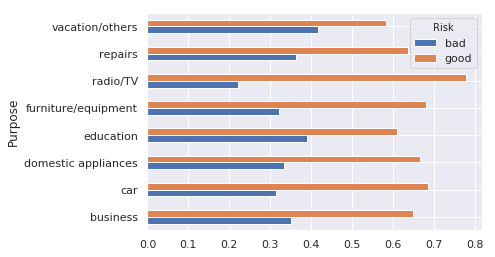

In [0]:
risk_purpose = pd.crosstab(Credit_data.Purpose,Credit_data.Risk, normalize='index')
print(risk_purpose)

figure = risk_purpose.plot(kind = 'barh')

In the visualization it is visible that no matter the purpose of the loan, the propobility for being good risk is higher than bad risk. Because of this it does not look like that there is a signifinace correlation between the risk and purpose of the loan.

top 3 of bad risks 
1. Vacation/Others
2. education 
3. repairs/business 

top 3 of good risks 
1. Radio/TV
2. furniture/equipment 
3. car 

**Sex AND Purpose**

We want to check if there is a coherence between sex and purpose. Because there are 70 % male and only 30 % female we will make a comparison between the variables seperately. First we compare female with purpose, which is visualized with True and men with purpose is visualised with False. 

Purpose  business   car  ...  repairs  vacation/others
Sex                      ...                          
False       0.097 0.337  ...    0.022            0.012

[1 rows x 8 columns]


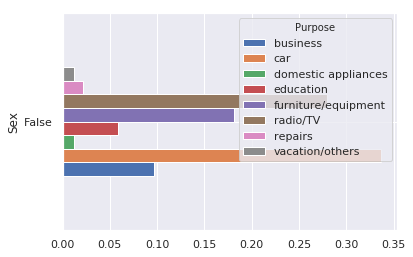

In [0]:
#Sex and purpose

male = Credit_data.Sex==True
sex_purpose = pd.crosstab(male, Credit_data.Purpose, normalize='index')
print(sex_purpose)

figure = sex_purpose.plot(kind = 'barh')

In the output we see that: 

- women are most likely to buy 'domestic appliances', 'education' and 'furniture'. 

whereas 

- men are most likely to buy 'car', business', repairs, vacations/others, radio/TV,

But hr

**Risk and Job**

Risk   bad  good
Job             
0    0.318 0.682
1    0.280 0.720
2    0.295 0.705
3    0.345 0.655


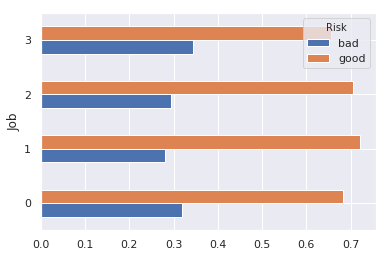

In [0]:
risk_job = pd.crosstab(Credit_data.Job,Credit_data.Risk, normalize='index')
print(risk_job)

figure = risk_job.plot(kind = 'barh')

It does not really look like there is a significant correlation with the job situation. It seems like there is almost the same distribution between good and bad risk independent of the job situation

**Risk and Housing**

Risk      bad  good
Housing            
free    0.407 0.593
own     0.261 0.739
rent    0.391 0.609


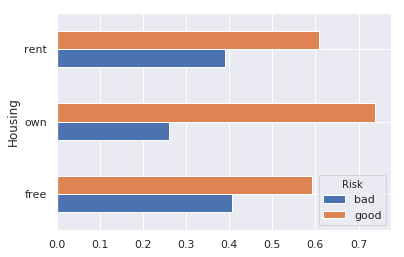

In [0]:
risk_housing = pd.crosstab(Credit_data.Housing,Credit_data.Risk, normalize='index')
print(risk_housing)

figure = risk_housing.plot(kind = 'barh')

It seems like house owners have a less likely probability of being bad risk than house renters and people living for free.

This might be due to the fact that to buy a house, there are requirements to ones financial stability. Also there might be a financial safety for the bank in loaners who has a house.

We will look more into a correlation between risk and finance. 

**Risk and Finance**

In [0]:
pd.crosstab(Credit_data.Saving_accounts, Credit_data.Risk, normalize='index')

Risk,bad,good
Saving_accounts,,
little,0.360,0.640
moderate,0.330,0.670
quite rich,0.175,0.825
rich,0.125,0.875


In this table see, that loaners have a little or moderate savings accounts are more likely to be a bad risk.  

In [0]:
pd.crosstab(Credit_data.Checking_account, Credit_data.Risk, normalize='index')

Risk,bad,good
Checking_account,,
little,0.493,0.507
moderate,0.390,0.610
rich,0.222,0.778


Here we again see that those with an little checking account are more likely to be classified as bad risk. 

**Risk and Credit amount**

In [0]:
#First categorizing age in intervals 
interval = (250, 1365.5, 2319.5, 3972.250, 18424)

credit_amount_cat = ['little', 'moderate', 'above moderate', 'high']
Credit_data["Credit_amount_cat"] = pd.cut(Credit_data.Credit_amount, interval, labels=credit_amount_cat)

Credit_data.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Age_cat,Credit_amount_cat
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior,little
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young,high
2,2,49,male,1,own,little,NaN,2096,12,education,good,Adult,moderate
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult,high
4,4,53,male,2,free,little,little,4870,24,car,bad,Adult,high


Risk                bad  good
Credit_amount_cat            
little            0.309 0.691
moderate          0.248 0.752
above moderate    0.224 0.776
high              0.420 0.580


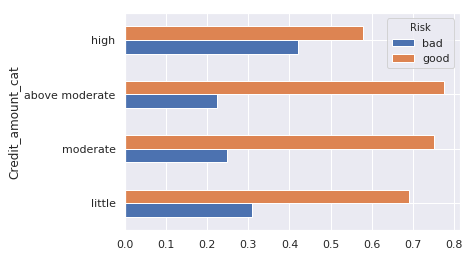

In [0]:

risk_credit_amount = pd.crosstab(Credit_data.Credit_amount_cat,Credit_data.Risk, normalize='index')
print(risk_credit_amount)

figure = risk_credit_amount.plot(kind = 'barh')

In this table we can determine, that the higher the credit amount the more likely one is to be a bad risk. 

**Duration**

In [0]:
#First categorizing duration into intervals 
interval = (4, 12, 18, 24, 72)

duration_cat = ['1 year', '18 mounts', '2 years', 'above 2 years']
Credit_data["Duration_cat"] = pd.cut(Credit_data.Duration, interval, labels=duration_cat)

Credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Age_cat,Credit_amount_cat,Duration_cat
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior,little,1 year
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young,high,above 2 years
2,2,49,male,1,own,little,NaN,2096,12,education,good,Adult,moderate,1 year
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult,high,above 2 years
4,4,53,male,2,free,little,little,4870,24,car,bad,Adult,high,2 years


In [0]:
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
Unnamed: 0           1000 non-null int64
Age                  1000 non-null int64
Sex                  1000 non-null object
Job                  1000 non-null int64
Housing              1000 non-null object
Saving_accounts      817 non-null object
Checking_account     606 non-null object
Credit_amount        1000 non-null int64
Duration             1000 non-null int64
Purpose              1000 non-null object
Risk                 1000 non-null object
Age_cat              1000 non-null category
Credit_amount_cat    999 non-null category
Duration_cat         994 non-null category
dtypes: category(3), int64(5), object(6)
memory usage: 89.4+ KB


We categorize this variable in intervals to get a manageable overview of the data. However, we will not be using this categorized variable later in the project. It is only for this EDA.

Risk            bad  good
Duration_cat             
1 year        0.215 0.785
18 mounts     0.299 0.701
2 years       0.295 0.705
above 2 years 0.443 0.557


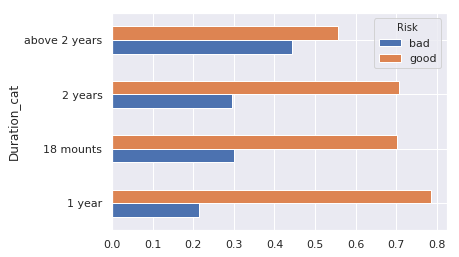

In [0]:
risk_duration = pd.crosstab(Credit_data.Duration_cat,Credit_data.Risk, normalize='index')
print(risk_duration)

figure = risk_duration.plot(kind = 'barh')

In this visualization it may be determined that the higher the duration the higher is the probability of being af bad risk. 

#Conclusion to EDA 
  
Overall we found some correlations between all the variables in the dataset. 

But we did not find any magnificent correlations between job and risk, therefore the variable 'Job' will not be a part of the further analysis.   

The variables that we find most interesting are Sex,Age Saving- and checking account, because these factors have a significant influence on the risk, therefore we also have an idea that these are important in predicting the risk of new loaners. 

In the output we see that there are some missing data - strings - space between columns name e.g. Saving accounts, Checking account and Credit amount. 

##Preprocessing 

We will try to convert the objects/strings to floats, and 'fix' the problem with the missing values. 

Because there are missing values in Saving_accounts and Checking_account, we need to either remove the colums or fill out the missing data. The reason for filling or removing missing data, is that we can work with them later on and make analysis. 

- We dont want to remove any colums because then we will lose too much information/data. Instead we want to fill our data by using the function .fillna - fillna(): Return a copy of the data with missing values filled or imputed

- We are also going to change the string into floats by assigning them a number by the function .map({}) and .astype(float)

In [0]:
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
Unnamed: 0           1000 non-null int64
Age                  1000 non-null int64
Sex                  1000 non-null object
Job                  1000 non-null int64
Housing              1000 non-null object
Saving_accounts      817 non-null object
Checking_account     606 non-null object
Credit_amount        1000 non-null int64
Duration             1000 non-null int64
Purpose              1000 non-null object
Risk                 1000 non-null object
Age_cat              1000 non-null category
Credit_amount_cat    999 non-null category
Duration_cat         994 non-null category
dtypes: category(3), int64(5), object(6)
memory usage: 89.4+ KB


In [0]:
Credit_data['Saving_accounts'] = Credit_data['Saving_accounts'].map({"little":0,"moderate":1,"quite rich":2 ,"rich":3 }).astype(float);
Credit_data['Saving_accounts'] = Credit_data['Saving_accounts'].fillna(Credit_data['Saving_accounts'].dropna().mean())#filling missing values with mean 

Credit_data['Checking_account'] = Credit_data['Checking_account'].map({"little":0,"moderate":1,"rich":2 }).astype(float);
Credit_data['Checking_account'] = Credit_data['Checking_account'].fillna(Credit_data['Checking_account'].dropna().mean())#filling missing values with mean 

In [0]:
Credit_data['Sex'] = Credit_data['Sex'].map({"male":0,"female":1}).astype(float);

Credit_data['Risk'] = Credit_data['Risk'].map({"good":0,"bad":1}).astype(float);

Credit_data['Housing'] = Credit_data['Housing'].map({"own":0,"free":1,"rent":2}).astype(float);

Credit_data['Purpose'] = Credit_data['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7}).astype(float);


Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
Unnamed: 0           1000 non-null int64
Age                  1000 non-null int64
Sex                  1000 non-null float64
Job                  1000 non-null int64
Housing              1000 non-null float64
Saving_accounts      1000 non-null float64
Checking_account     1000 non-null float64
Credit_amount        1000 non-null int64
Duration             1000 non-null int64
Purpose              1000 non-null float64
Risk                 1000 non-null float64
Age_cat              1000 non-null category
Credit_amount_cat    999 non-null category
Duration_cat         994 non-null category
dtypes: category(3), float64(6), int64(5)
memory usage: 89.4 KB


##Unsupervised ML

<p>In this section we are working with Unsupervised Machine Learning. Which means pattern recognition and data exploration, by performing the tasks below:
  
  

*   **Dimensionality Reduction** - Finding patterns in the features of the data 
*   **Clustering** - Finding subgroups within larger groups 

For the dimensionality reduction, we're going to perform a PCA. For Clustering we are using KMeans</p>

<p>Prior to performing the PCA, we need to scale the data. This we do, by importing the StandardScaler () function from the library sklearn.  

In [0]:
#Let's standard-scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = ['Age', 'Sex', 'Saving_accounts', 'Housing', 'Purpose', 'Checking_account', 'Duration', 'Credit_amount']

x = Credit_data.loc[:, features]
y = Credit_data.loc[:, 'Risk']

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
Age                 1000 non-null int64
Sex                 1000 non-null float64
Saving_accounts     1000 non-null float64
Housing             1000 non-null float64
Purpose             1000 non-null float64
Checking_account    1000 non-null float64
Duration            1000 non-null int64
Credit_amount       1000 non-null int64
dtypes: float64(5), int64(3)
memory usage: 62.6 KB


###PCA 

In [0]:
data_scaled = StandardScaler().fit_transform(x)
data_scaled.shape

(1000, 8)

<p>After scaling the data, we can perform the PCA analysis. Principal Component Analysis summarizes the information, by reducing dimensionality of the data without losing too much important information. As we se above, the shape of data_scaled tells us that there are 1000 rows and 8 dimensions. Here we want to reduce the number of dimensions, by using the PCA() function from the sklearn library. </p>

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6) 

# Fit and transform the data
data_reduced = pca.fit_transform(data_scaled)
data_reduced.shape

(1000, 6)

<p>As it looks, we succesfully reduced the number of dimensions from 14 to 6 dimensions. Now we are going to have a look at the Explained Variance Ratio, to tell us how much data is saved and how much is lost. </p>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")

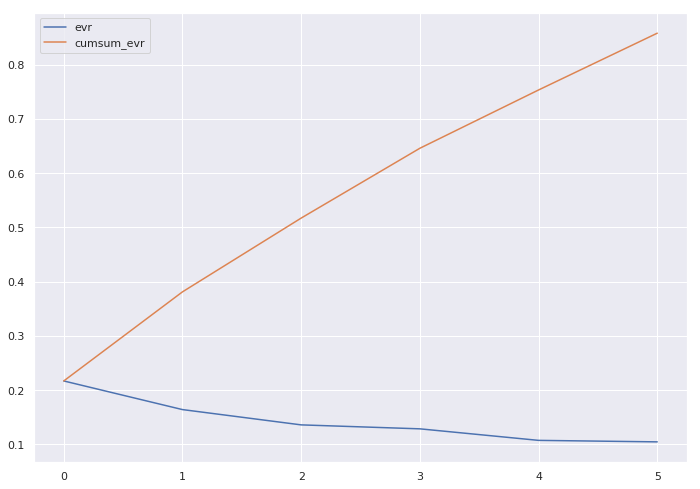

In [0]:
plot_data = pd.DataFrame({'evr': pca.explained_variance_ratio_, 'cumsum_evr': np.cumsum(pca.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [0]:
evr_sum = (pca.explained_variance_ratio_ * 100).sum()
evr_sum

85.78341815507252

<p>After reducing the amount of components to eight and visualizing it above, we can
see the that with six components we have only reduced the amount the original knowledge
with about 15 percent. This is verified with the additional calculation, which states the
cumulative explained variance ratio to be 85,7 percent. If we reduced the number of dimensions more, the EVR would be reduced too, which indicates that too much important information may be left out.  </p>


###Alternative Dimensionality Reduction techniques 
<p>The PCA is ideal for large quantitative datasets, where our dataset contain both qualitative and quantitative values, wherefore the PCA technique actually might not be ideal. Alternatively, the Dimensionality Reduction technique UMAP could be performed instead. UMAP (Uniform Manifold Approximation and Projection) is a more practical scalable algorithm, which applies to real world data and preserves more of the global structure. Wherefore, it is more viable as a general purpose dimension reduction technique for machine learning. 

However, this was realized late in the process where the data has been cleaned, processed and adapted to fit the PCA technique. Attempts to change from PCA to UMAP resulted in collateral errors further down in the code, wherefore we decided to keep the PCA technique. </p>


###Cluster Analysis with KMeans 
<p> Now we want to subgroup our data in clusters. We are doing this, using the clustering algorithm KMeans which searches for a pre-determined number of clusters in our dataset. 

To determine how many clusters that is ideal, we use the Elbow Method. The Elbow method works by fitting the model with a range of values for K. Though, the problem with this method is that it does not work well, if the data is not very clustered. </p> 

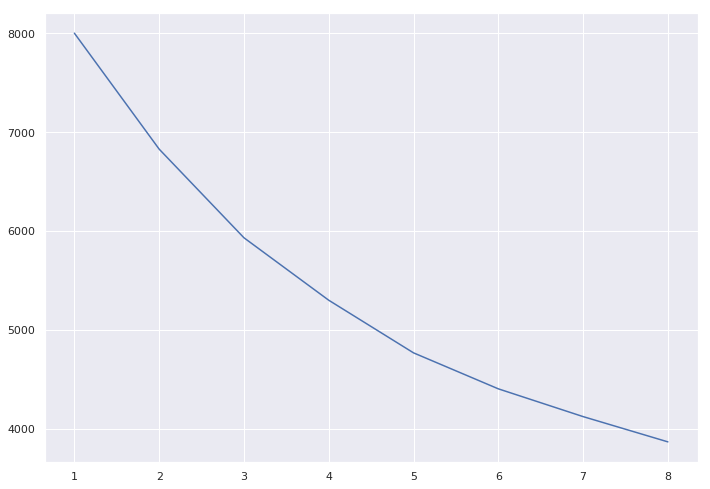

In [0]:
 from sklearn.cluster import KMeans 
inertia = []
for i in range(1,9):
  k_means = KMeans(n_clusters=i)
  inertia.append(k_means.fit(data_scaled).inertia_)

sns.lineplot(y = inertia, x = range(1,9))

<p> As we see in our visualization, a clear ‘elbow’ is not really visible. But we do see a bend between three and four, indicating that would be an optimal amount of clusters. Therefore we choose three as our predetermined number of clusters. </p>

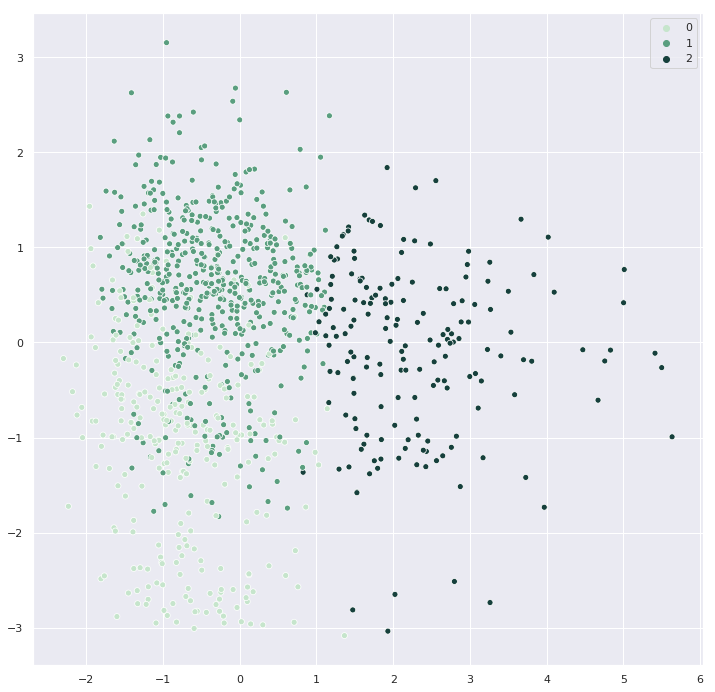

In [0]:
# Imorting KMeans to make the clusters.  
from sklearn.cluster import KMeans 

# creating the clusters and transforming them 
clusterer = KMeans(n_clusters=3)
clusterer.fit(data_scaled)

#Plotting the clusters  
plt.figure(figsize=(12,12))
g = sns.scatterplot(data_reduced[:,0],data_reduced[:,1],hue=clusterer.labels_,
               legend='full', palette='ch:2.5,-.2,dark=.2')

legend = g.get_legend()

###Cluster data
<p>In the visualization we see three clusters, where the dark colored is the most densed and clustered and the two others are more dispersed.  

To make something out of these cluster, we want to turn the cluster into readable data by using the **.labels_** method. But first we choose the features of the columns we want to be shown, using **[]** to make an array of the chosen columns and storing them in the variable **vars_descr**

When printing the information of the clusters, we use a **.groupby()** method to split the clusters from one another and the **mean()** function to show the average values for each of the three clusters. </p>

In [0]:
#Here we choose the features we want shown
vars_descr = ["Age", "Sex","Housing", "Saving_accounts", "Checking_account", "Credit_amount", "Duration", "Purpose", "Risk", "Age_cat"]
descr = Credit_data[vars_descr]

#Here we write the clusters into readable data
descr['cluster'] = clusterer.labels_
Credit_data['cluster'] = clusterer.labels_

#Here we group the clusters and print their mean
descr.groupby('cluster').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Age,Sex,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
cluster,,,,,,,,,
0,32.662,1.000,0.683,0.482,0.648,2206.450,16.835,1.881,0.313
1,36.728,0.000,0.338,0.483,0.668,2310.108,17.004,1.954,0.237
2,36.438,0.180,0.517,0.335,0.609,7871.719,39.174,2.865,0.472


An analysis of the clusters based on above table is found in the stakeholder report. 
We do not interpret the variables, which originally were categorical but we transformed to floats (Housing and Porpuse) because it does not make sense to weight the categories as numbers. 

###Conclusion on Unsupervised Machine Learning 
<p>In the PCA, attributes with strong similarities were gathered in 6 Principal Components and grouped into 3 clusters. In the three clusters the age only vary very little, from 32 - 36. However, the ones with a higher risk rating the are types in Cluster 1: Males, with a credit amount on aboout 7700 and a duration of 39 months. On the other hand, the types in Cluster 2 has a lower risk rating: Males with a credit amount of 2300 and and lower duration of only 17 months. 
  
Customers with smaller loans and a lower durations therefore probably seem to be less of a risk, compared to customers with a bigger loan and higher duration. </p>  

#Supervised machine learning 


**Library Imports for supervised ML**

In [0]:
!pip install -U mlxtend
!pip install catboost
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

###Preprocessing for Supervised Machine Learning

To create supervised machine learning models, the data needs furhter preprocessing. 
The purpose of supervised machine learning is to predict certain factors - in this case if a loaner is good or bad risk. The proprocessing consists of data splitting and in this case balancing unbalanced data. 






In order to these predicting models the data should be split into training and testing data sets. 

The training set is the amount of data, that the software will have access to and use as foundation for the model development. 

The testing set is used to evaluate the models. The testing set will test the models' ability to predict the outcome of the data which has been hidden so far. 

We set the test data to 25 % of the original data set. Also, the data has to normalized to perform supervised machine learning. This has already been done in earlier preprocessing and we are using the earlier defined variable **data_scaled** and our earlier defined **y variable**. 

For splitting we use the **train_test_split** function: 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.25, random_state = 36)

The data has now been split and is saved in a training and testing data set, and should now be ready for supervised machine learning. 

But, first we want to look more into the distribution in the 'Risk' variable. In the explorative data analysis it was clear that for every factor there was a higher probability of being good risk than bad, which might indicate an inequality in the data 

0.000    700
1.000    300
Name: Risk, dtype: int64

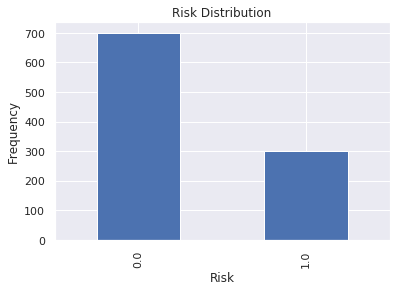

In [0]:
#Plotting the risk variable to see the distribution 
pd.value_counts(Credit_data['Risk']).plot.bar()
plt.title('Risk Distribution')
plt.xlabel('Risk')
plt.ylabel('Frequency')
Credit_data['Risk'].value_counts()

It is cleat that there is a significant higher amount of observation in the good risk categori than in the bad risk categori.

We chack the exact amount of observations in the y-varibale ('risk') in the training training data set:

In [0]:
print(format(sum(y_train==1)))
print(format(sum(y_train==0)))

230
520


This shows that there are 230 observations in the training data defined as bad risk, while there are 520 observations defined as good risk. The unequal distribution will effect the predictions of the models. 

TO make the models more reliable, we use the function SMOTE to oversampel our dataset. This means that based on the existing data, the computer will generate more observation from how it think they will look like in order to the existing ones. 

In [0]:
#Using SMOTE to oversampel 
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_sample(x_train, y_train.ravel())

Printing the number of observations after SMOTING: 

In [0]:
#How many observations in the training set categorized as bad risk after oversampling
print(format(sum(y_train==1)))

#How many observations in the trainng set categorized as good risk after oversampling
print(format(sum(y_train==0)))

#Are the number of observations equal in the x variable og and the y variable after oversampling?
print(format(x_train.shape))
print(format(y_train.shape))

520
520
(1040, 8)
(1040,)


After SMOTING we see that the number of observations have changed to 520 in both good and bad risk. 
We also see that the features have been oversampled too, so x and y contains the same amount of observations. 

We are aware that this unequal distribution have effected the analysis so far both in the explorative analysis and the unsupervised analysis. But we have not been able to solve this problem until after we split the data for the supervised machine learning.

However, now the foundation for predicting is valid and the data is ready for the prediction models

###Training and evaluation of prediction models

in the following we will test 4 different predictive models: Logistic regression, RandomForrest, XGBoost and DecisionTree. It will be evaluated which of these models are the best solution

**Model 1: Logisitsk regression**

In [0]:
model = LogisticRegression()

scores = cross_val_score(model, x_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(x_train, y_train)

predictions = model.predict(x_test)

# Model performance on the test-set
print(model.score(x_test, y_test))

[0.66346154 0.66346154 0.65384615 0.65865385 0.61057692]
0.648


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

<p>In this model the mean accuracy is about 65 %, which is decent but not great. We look into the performance of the logistic regression model</p>

In [0]:
#Performance evaluation on logistic regression:
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.68      0.73       180
         1.0       0.41      0.57      0.48        70

    accuracy                           0.65       250
   macro avg       0.61      0.62      0.61       250
weighted avg       0.69      0.65      0.66       250



In the performance evaluation we see that out of 70 observation, the model predicted 57 % of the bad risk correct and 68 % of the good risk correct. But that also means that in respecively 43 % and 32 % of the times it predicted wrong. 

We visualize this performance in a confusion plot: 

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faef6ed3f98>)

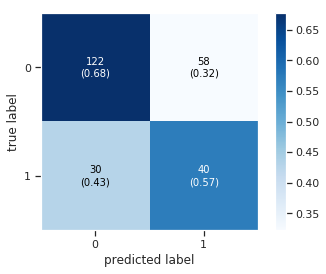

In [0]:
#confusion matrix of logistic regression
confmatrix = confusion_matrix(y_test,y_pred) 


plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

**Model 2: RandomForrest**

In [0]:
model = RandomForestClassifier()

scores = cross_val_score(model, x_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(x_train, y_train)

predictions = model.predict(x_test)

# Model performance on the test-set
print(model.score(x_test, y_test))

[0.68269231 0.6875     0.79326923 0.80288462 0.80769231]
0.732


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Here we have aveage accuracy of about 74 % which is an improvement from the logistic regression. What is the performance evaluation of this model: 

In [0]:
#Performance evaluation of RandomForrest:

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       180
         1.0       0.52      0.46      0.49        70

    accuracy                           0.73       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.72      0.73      0.73       250



THe RandomForrest model prdicts the bad risk right in 59 % of the times, which is almost the same as the logistic regression model. On the good risk it performs pretty well, here it predicts right in 79 % of the times. 

Visualy it looks like this: 

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faf06a8e860>)

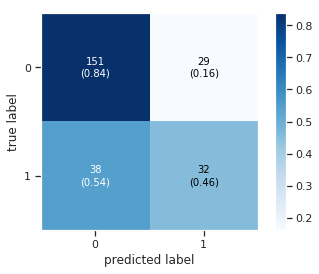

In [0]:
#confusion matrix of RandomForrest model:
confmatrix = confusion_matrix(y_test,y_pred) 

plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

**Model 3: XGBoost**

In [0]:
model = xgb.XGBClassifier()

scores = cross_val_score(model, x_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(x_train, y_train)

predictions = model.predict(x_test)

# Model performance on the test-set
print(model.score(x_test, y_test))

[0.75       0.68269231 0.76923077 0.79807692 0.82211538]
0.724


The XGboost model has an aveage accuracy of 72,4 % 

In [0]:
#Performance evaluation of XGBoost 
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80       180
         1.0       0.51      0.64      0.57        70

    accuracy                           0.72       250
   macro avg       0.68      0.70      0.68       250
weighted avg       0.75      0.72      0.73       250



The model predicts right 64 % of the times with bad risk, and 76 % of the times with good risk 

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faee2be6be0>)

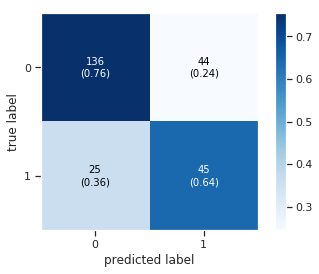

In [0]:
#confusion matrix of XGboost 
confmatrix = confusion_matrix(y_test,y_pred) 


plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

**Model 4: decisiontree**

In [0]:
model = DecisionTreeClassifier()

scores = cross_val_score(model, x_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(x_train, y_train)

predictions = model.predict(x_test)

# Model performance on the test-set
print(model.score(x_test, y_test))

[0.70673077 0.62019231 0.72115385 0.73557692 0.75961538]
0.66


In this last model we have an aveage accuracy on about 67 % 

In [0]:
#Performance evaluation of desiciontree 
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75       180
         1.0       0.42      0.53      0.47        70

    accuracy                           0.66       250
   macro avg       0.61      0.62      0.61       250
weighted avg       0.69      0.66      0.67       250



The models predicts 56 % of the bad risks correct and 72 % of the good risks right. 

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faee2a14358>)

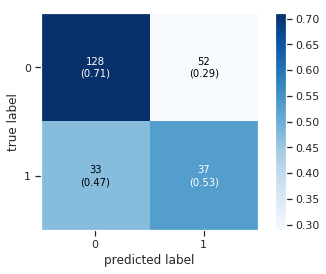

In [0]:
#confusion matrix of decisiontree 
confmatrix = confusion_matrix(y_test,y_pred) 


plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

###Conclusion on supervised prediction models

In this paragraph we have tested four different models: Logistic regression, RandomForrest, XGBoost and decisiontree. 

The one having the highest aveage accuracy is the RandomForrest model with an aveage accuracy on 74 %, this is followed by the XGBoost model with an aveage accuracy on about 72 %. 

However the most interessting factor for a client would be to predict whenever a loaner is a bad risk. Therefore we will use the prediction of the bad risks from the performance evaluation to assess the most preferable model. Here the XGBoost model has the highest recall proportion on: this models predicts right in 64 % of the times with the bad risk. Since the XGBoost model also had a high average accuracy, it would be the most preferable model. 

Even Though this model is the most preferable in this analysis 64 % is not that ideal in the real life. Using this model would mean that almost half of the times a bank would not identify the bad risk loaners.